# Voice detection

## Importing packages needed

In [ ]:
from scipy.io import wavfile

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
frequency_sampling, audio_signal = wavfile.read('/content/drive/MyDrive/voice_sample.wav')

<ipython-input-3-65eae89c1d6b>:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  frequency_sampling, audio_signal = wavfile.read('/content/drive/MyDrive/voice_sample.wav')


In [ ]:
print('\n Signal shape:', audio_signal.shape)
print('\n Signal Datatype:', audio_signal.dtype)
print('\n Signal duration:', round(audio_signal.shape[0] / float(frequency_sampling), 2), 'seconds')


 Signal shape: (1322253, 2)

 Signal Datatype: int16

 Signal duration: 29.98 seconds


## Normalization

In [ ]:
audio_signal = audio_signal / np.power(2,15)

## Extracting 100 first values

In [ ]:
audio_signal = audio_signal[0:100]

time_axis = 1000*np.arange(0, len(audio_signal), 1) / float(frequency_sampling)

## Plotting

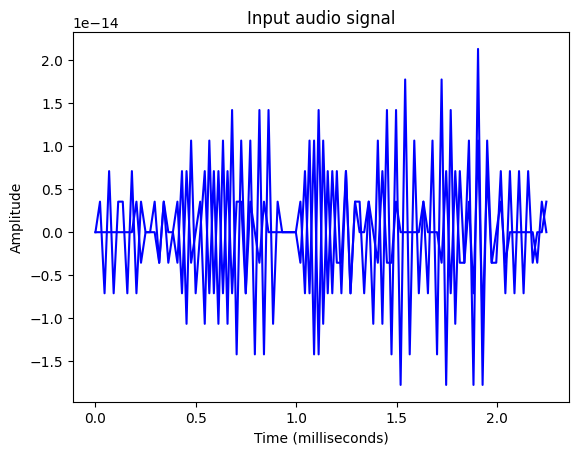

In [ ]:
plt.plot(time_axis,audio_signal,color='blue')
plt.xlabel('Time (milliseconds)')
plt.ylabel('Amplitude')
plt.title('Input audio signal')
plt.show()

In [ ]:
length_signal = len(audio_signal)

length_signal

100

In [ ]:
half_length = np.ceil((length_signal + 1)/2.0).astype(int)

half_length

51

## Transform to Fourier frequency

In [ ]:
signal_frequency = np.fft.fft(audio_signal)

In [ ]:
signal_frequency = abs(signal_frequency[0:half_length]) / length_signal

In [ ]:
signal_frequency **= 2

In [ ]:
len_fts = len(signal_frequency)

len_fts

51

Fourier frequency signal must devide to even or odd positions

In [ ]:
if length_signal % 2:
  signal_frequency[1:len_fts] *= 2
else:
  signal_frequency[1:len_fts-1] *= 2

signal_frequency

array([[0.00000000e+00, 0.00000000e+00],
       [2.52435490e-33, 2.52435490e-33],
       [1.00974196e-32, 1.00974196e-32],
       [1.00974196e-32, 1.00974196e-32],
       [1.00974196e-32, 1.00974196e-32],
       [2.52435490e-33, 2.52435490e-33],
       [2.52435490e-33, 2.52435490e-33],
       [1.00974196e-32, 1.00974196e-32],
       [1.00974196e-32, 1.00974196e-32],
       [2.52435490e-33, 2.27191941e-32],
       [0.00000000e+00, 1.00974196e-32],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [2.52435490e-33, 2.52435490e-33],
       [1.00974196e-32, 0.00000000e+00],
       [1.00974196e-32, 0.00000000e+00],
       [2.52435490e-33, 2.52435490e-33],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00974196e-32],
       [0.00000000e+00, 4.03896783e-32],
       [2.52435490e-33, 6.31088724e-32],
       [1.00974196e-32, 4.03896783e-32],
       [1.00974196e-32, 1.00974196e-32],
       [2.52435490e-33, 2.52435490e-33],
       [2.524354

### Extracting power in DB

In [ ]:
signal_power = 10*np.log10(signal_frequency)

signal_power

<ipython-input-25-c52a05284769>:1: RuntimeWarning: divide by zero encountered in log10
  signal_power = 10*np.log10(signal_frequency)


array([[         -inf,          -inf],
       [-325.97849588, -325.97849588],
       [-319.95789597, -319.95789597],
       [-319.95789597, -319.95789597],
       [-319.95789597, -319.95789597],
       [-325.97849588, -325.97849588],
       [-325.97849588, -325.97849588],
       [-319.95789597, -319.95789597],
       [-319.95789597, -319.95789597],
       [-325.97849588, -316.43607079],
       [         -inf, -319.95789597],
       [         -inf,          -inf],
       [         -inf,          -inf],
       [-325.97849588, -325.97849588],
       [-319.95789597,          -inf],
       [-319.95789597,          -inf],
       [-325.97849588, -325.97849588],
       [         -inf,          -inf],
       [         -inf, -319.95789597],
       [         -inf, -313.93729605],
       [-325.97849588, -311.99909579],
       [-319.95789597, -313.93729605],
       [-319.95789597, -319.95789597],
       [-325.97849588, -325.97849588],
       [-325.97849588, -311.99909579],
       [-325.97849588, -3

### Plotting

In [ ]:
x_axis = np.arange(0,half_length,1)*(frequency_sampling / length_signal) / 1000.0

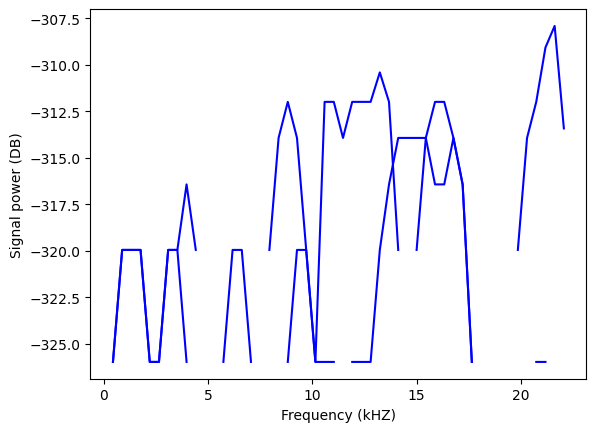

In [ ]:
plt.figure()
plt.plot(x_axis, signal_power, color='blue')
plt.xlabel('Frequency (kHZ)')
plt.ylabel('Signal power (DB)')
plt.show()

## Uniform signal producing

In [30]:
from scipy.io.wavfile import write

In [32]:
out_producePurpose_file = '/content/drive/MyDrive/ForUsingInUniformProducing_voice_sample.wav'

In [33]:
# Parameters for producing

duration = 4 # in seconds
frequency_sampling = 4400 # in Hz
frequency_tone = 784
min_val = -4*np.pi
max_val = 4*np.pi

In [35]:
t = np.linspace(min_val,max_val,duration*frequency_sampling)

audio_signal = np.sin(2 * np.pi * frequency_tone * t)

In [36]:
write(out_file, frequency_sampling, t)

### Extracting 100 first values

In [37]:
audio_signal = audio_signal[:100]
time_axis = 1000*np.arange(0, len(audio_signal), 1) / float(frequency_sampling)

### Plotting

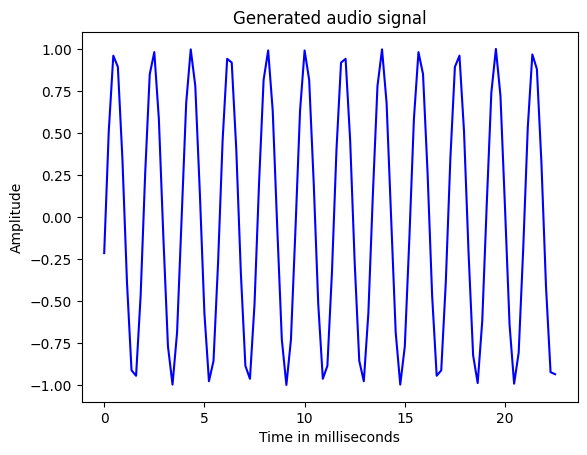

In [38]:
plt.plot(time_axis, audio_signal, color='blue')
plt.xlabel('Time in milliseconds')
plt.ylabel('Amplitude')
plt.title('Generated audio signal')
plt.show()

## Feature extraction

(MFCC, PLP, PLPRASTA, ... techniques)

In [40]:
pip install python_speech_features

  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5868 sha256=0207736b979b136745f49380317230fe57106130f03020034b1d4ee18e78e912
  Stored in directory: /root/.cache/pip/wheels/5a/9e/68/30bad9462b3926c29e315df16b562216d12bdc215f4d240294
Successfully built python_speech_features


In [65]:
from python_speech_features import mfcc, logfbank

In [66]:
frequency_sampling, audio_signal = wavfile.read('/content/drive/MyDrive/voice_sample.wav')

<ipython-input-66-65eae89c1d6b>:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  frequency_sampling, audio_signal = wavfile.read('/content/drive/MyDrive/voice_sample.wav')


### Extracting 15000 (for feature extraction) first values

In [78]:
audio_signal = audio_signal[:15000]

audio_signal.shape

(67, 2)

### Extracting MFCC features

In [79]:
features_mfcc = mfcc(audio_signal, frequency_sampling)

In [80]:
print('\n Number of windows:', features_mfcc.shape[0])
print('Length of each feature:', feature_mfcc.shape[1])


 Number of windows: 1


NameError: name 'feature_mfcc' is not defined

### Plotting MFCC features

Text(0.5, 1.0, 'MFCC')

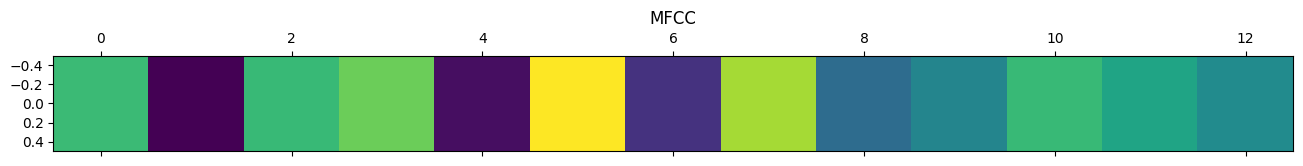

In [82]:
features_mfcc = features_mfcc.T
plt.matshow(features_mfcc)
plt.title('MFCC')

### Extracting Filter Bank features (logfbank)

In [83]:
filterbank_features = logfbank(audio_signal, frequency_sampling)

In [85]:
print('\n Filter bank: \n Number of windows=', filterbank_features.shape[0])
print(' Length of each feature= ', filterbank_features.shape[1])


 Filter bank: 
 Number of windows= 1
 Length of each feature=  26


In [86]:
filterbank_features = filterbank_features.T

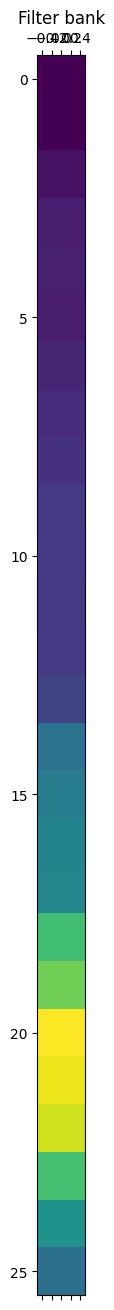

In [87]:
plt.matshow(filterbank_features)
plt.title('Filter bank')
plt.show()